### Amazon Book Reviews: Review of the top 50 reviewers and feature extraction from their review texts

This is the 5-core dataset which means that each user and item has at least 5 reviews. The original dataset has ~9 million reviews: http://jmcauley.ucsd.edu/data/amazon/.  I have created a subset which contains reviews of the top 50 reviewers. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.io import gbq
%matplotlib inline

In [2]:
df = pd.read_csv('top50reviews.csv')

In [450]:
df.tail(2)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title
128756,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",0307338312,220,248,2008-02-24 00:00:00 UTC,Deepak Chopra's new book is not quite as contr...,312,3,Is Jesus just an Enlightened Master?,The Third Jesus: The Christ We Cannot Ignore
128757,A14OJS0VWMOSWO,Midwest Book Review,0895949903,248,251,2001-03-12 00:00:00 UTC,The Herbal Medicine-Makers Handbook blends the...,58,5,Far more in-depth than your usual herbal recip...,The Herbal Medicine-Maker's Handbook: A Home M...


In [451]:
len(df.asin.unique()) # Number of distinct books

88819

In [452]:
a = df.groupby(['reviewerID', 'reviewerName']).size().sort_values(ascending = False)
a

reviewerID      reviewerName                                    
AFVQZQ8PW0L     Harriet Klausner                                    23212
A14OJS0VWMOSWO  Midwest Book Review                                 16090
A2F6N60Z96CAJI  Bookreporter                                         5878
A320TMDV6KCFU   MNix                                                 4209
AHUT55E980RDR   Neal C. Reynolds                                     3061
A13QTZ8CIMHHG4  LAS Reviewer "The Long and the Short Of It Re...     2948
A1K1JW1C5CUSUZ  Donald Mitchell "Jesus Loves You!"                   2906
A328S9RN3U5M68  Grady Harp                                           2795
A2TX179XAT5GRP  TeensReadToo "Eat. Drink. Read. Be Merrier."         2527
A21NVBFIEQWDSG  Armchair Interviews                                  2526
A2VKWLCNZF4ZVB  The RAWSISTAZ Reviewers                              2433
A1S3C5OFU508P3  Charles Ashbacher                                    2317
A1X8VZWTOG8IS6  Blue Tyson "- Research Finished

**Harriet Klausner** has written 23,212 reviews. She is a hall of fame reviewer and has a wiki page: https://en.wikipedia.org/wiki/Harriet_Klausner. She has a fair amount of criticism too.

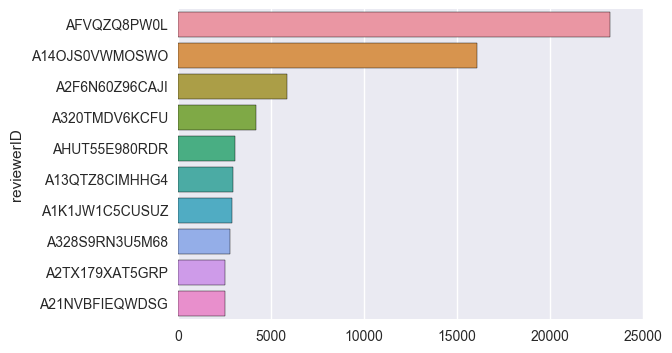

In [24]:
sns.set_style('darkgrid')
b = a[:10]
sns.barplot(b, b.index)

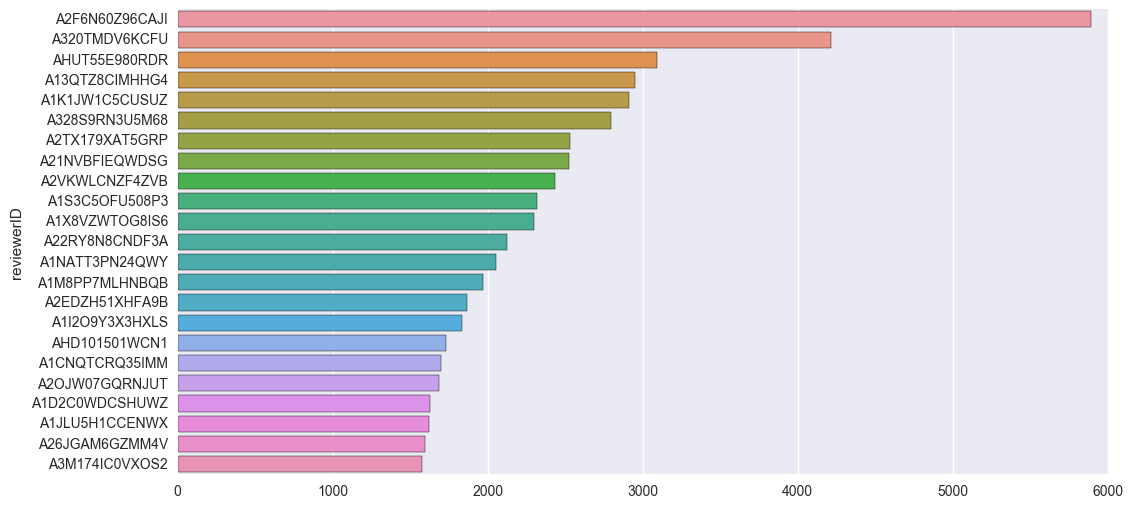

In [25]:
plt.figure(figsize= [ 12, 6])
b = a[2:25]
sns.barplot(b, b.index)

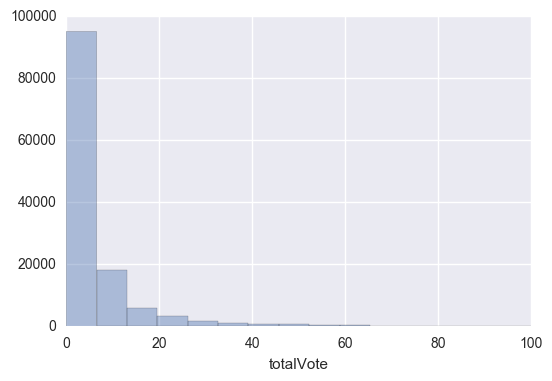

In [33]:
sns.distplot(df.totalVote, kde = False, bins = 200)
plt.xlim([0, 100])
plt.show()

In [34]:
len(df[df.totalVote == 0]) ## total 0 votes 

26541

In [35]:
len(df) ## total length of the dataset

128758

### Number of reviews over the years

In [453]:
df.loc[:, 'unixReviewTime'] =  pd.to_datetime(df.loc[:, 'unixReviewTime'])

In [454]:
a = df.groupby(df.unixReviewTime.dt.year).size()
a

unixReviewTime
1998       13
1999      198
2000     2430
2001     3669
2002     3200
2003     4318
2004     6541
2005     7777
2006     9160
2007    11781
2008    11069
2009    11988
2010    12940
2011    10229
2012    11286
2013    14371
2014     7788
dtype: int64

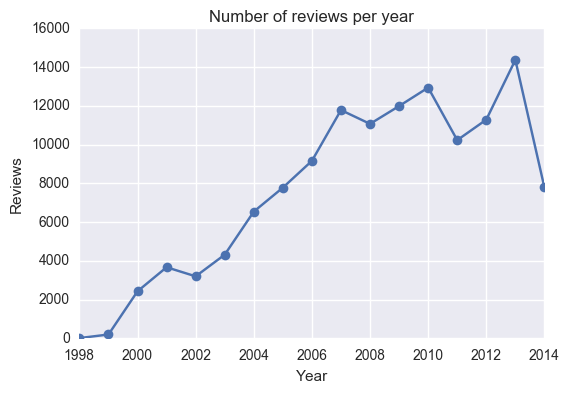

In [455]:
sns.set_style('darkgrid')
a.plot(kind = 'line', marker = 'o')
plt.xlabel("Year")
plt.title("Number of reviews per year")
plt.ylabel("Reviews")
plt.show()

### Star rating

In [456]:
a = df.groupby('overall').size()
a

overall
1     1102
2     2847
3    10596
4    36864
5    77349
dtype: int64

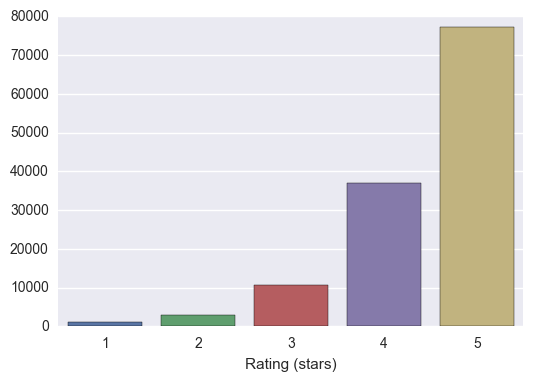

In [458]:
sns.barplot(a.index, a)
plt.xlabel("Rating (stars)")
plt.show()

### Reviews of Harriet Klausner 

In [460]:
drev1 = df [df.reviewerID == 'AFVQZQ8PW0L']
drev1.tail(2)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title
128608,AFVQZQ8PW0L,Harriet Klausner,1401301312,121,130,2004-04-29,If a reader has to choose one expos&eacute; bo...,227,5,excellent but frightening,The Exception to the Rulers: Exposing Oily Pol...
128671,AFVQZQ8PW0L,Harriet Klausner,0373802099,139,156,2004-07-28,In a world in which most people believe that m...,278,5,wonderful romantic fantasy,"Staying Dead (Retrievers, Book 1)"


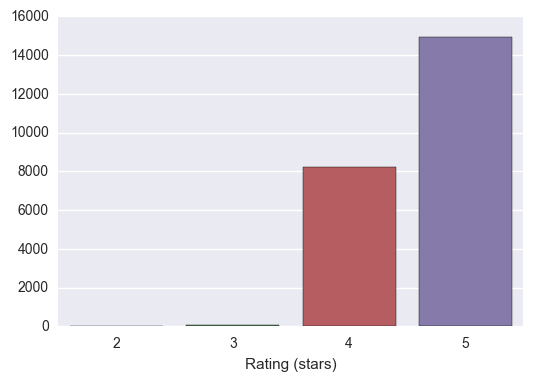

In [461]:
a = drev1.groupby('overall').size()
sns.barplot(a.index, a)
plt.xlabel("Rating (stars)")
plt.show()

In [462]:
b = drev1.groupby(drev1.unixReviewTime.dt.year).size()
b

unixReviewTime
1999      44
2000     782
2001    1015
2002     968
2003    1341
2004    1488
2005    1468
2006    1831
2007    1892
2008    2002
2009    2373
2010    2327
2011    2296
2012    1988
2013     997
2014     410
dtype: int64

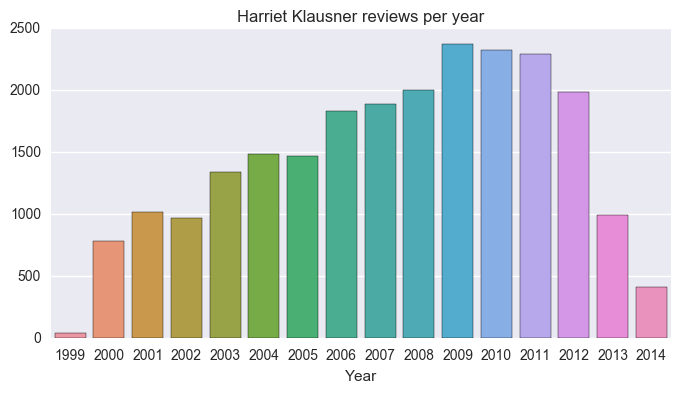

In [463]:
plt.figure(figsize= [8, 4])
sns.barplot(b.index, b)
plt.xlabel("Year")
plt.title ("Harriet Klausner reviews per year")
plt.show()

### Helpfulness ratings of the reviewers 

In [464]:
df['percHelpful'] = df.helpfulVote/df.totalVote
df['percHelpful'] = df['percHelpful'].fillna(0)
df.head(1)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title,percHelpful
0,A1JLU5H1CCENWX,NaN,B00HYQJPC2,0,0,2014-02-02,I made lots of notes in this book and I don't ...,581,5,Dex,NaN,0.0


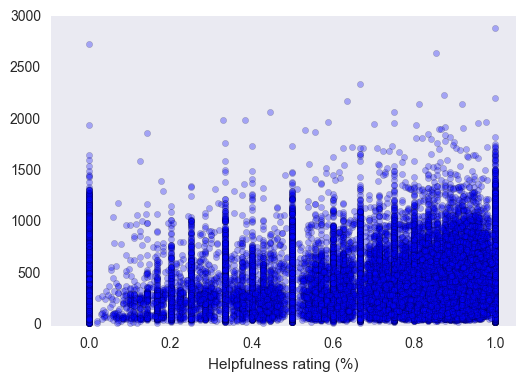

In [465]:
sns.set_style('dark')
plt.scatter(df.percHelpful, df.wordLength, alpha = 0.3)
plt.ylim([-20, 3000])
plt.xlim([-.095, 1.05])
plt.xlabel ("Helpfulness rating (%)")
plt.show()

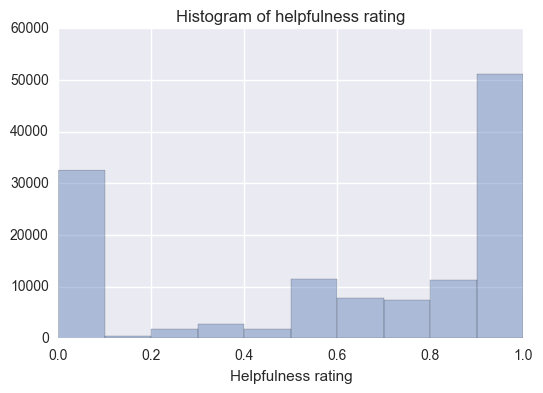

In [78]:
sns.set_style('darkgrid')
sns.distplot(df.percHelpful, kde = False, bins = 10)
plt.xlabel('Helpfulness rating')
plt.title('Histogram of helpfulness rating')

In [467]:
drev1 = df [df.reviewerID == 'AFVQZQ8PW0L']
drev1.tail(1)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title,percHelpful
128671,AFVQZQ8PW0L,Harriet Klausner,0373802099,139,156,2004-07-28,In a world in which most people believe that m...,278,5,wonderful romantic fantasy,"Staying Dead (Retrievers, Book 1)",0.891026


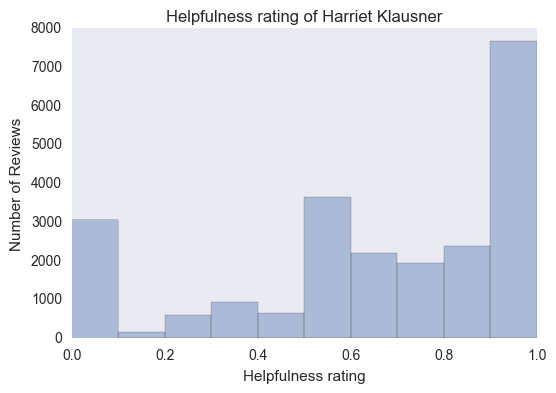

In [469]:
sns.distplot(drev1.percHelpful, kde = False, bins = 10)
plt.xlabel('Helpfulness rating')
plt.ylabel('Number of Reviews')
plt.title('Helpfulness rating of Harriet Klausner')
plt.show()

In [82]:
bins = [-.09, .25, 0.5, .75, 1.01 ]

In [83]:
group_names = ['below 25%', '25-50%', '51-75%', '76-100%']

In [109]:
df1 = df[['reviewerID', 'reviewerName', 'percHelpful']]

In [178]:
a = df1.groupby(['reviewerID', 'reviewerName'])

In [479]:
b = a['percHelpful'].mean().sort_values(ascending = False)
dhr = pd.DataFrame(b)
dhr = dhr.reset_index()
dhr

,reviewerID,reviewerName,percHelpful
0,A328S9RN3U5M68,Grady Harp,0.880532
1,A1MC6BFHWY6WC3,D. Blankenship,0.877999
2,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",0.857057
3,A3M174IC0VXOS2,Gail Cooke,0.827966
4,A26JGAM6GZMM4V,Robert Morris,0.810562
5,A2MF2QVSCUI27G,"Luan Gaines ""luansos""",0.776632
6,AC1K4OQOZ90RS,"E. Bukowsky ""booklover10""",0.774243
7,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",0.761835
8,A3R19YKNL641X3,"Thomas Duff ""Duffbert""",0.758509
9,A1M8PP7MLHNBQB,"John Matlock ""Gunny""",0.745602


**Grady Harp** is the most helpful reviewer. **Harriet Klausner** has a rating of 0.65. 

In [110]:
df1['category'] = pd.cut(df1.loc[:, 'percHelpful'], bins, labels=group_names)
df1.head(1)

C:\Users\Bis\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,reviewerID,reviewerName,percHelpful,category
0,A1JLU5H1CCENWX,NaN,0.0,below 25%


In [111]:
a = pd.value_counts(df1['category'])
a

76-100%      63994
below 25%    34420
51-75%       17013
25-50%       13331
Name: category, dtype: int64

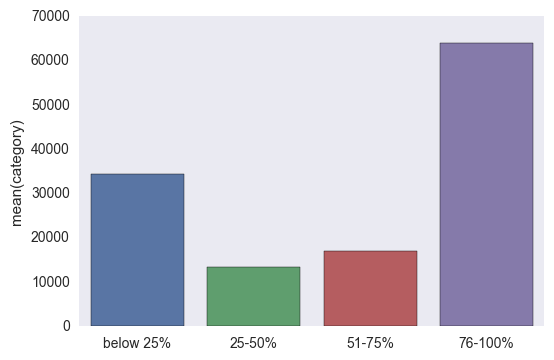

In [90]:
sns.set_style('dark')
sns.barplot(a.index, a)

In [117]:
g = df1.groupby(['reviewerID', 'reviewerName', 'category']).size().sort_values(ascending = False)
g.unstack().fillna('')

,category,below 25%,25-50%,51-75%,76-100%
reviewerID,reviewerName,,,,
A13G1TKIKHGV3F,M. Heiss,672,102,97,528
A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",1271,104,120,1453
A14OJS0VWMOSWO,Midwest Book Review,3540,1677,2151,8722
A18FUHNBP90IB4,cb,550,149,162,411
A18JHVX925K101,Dii,270,50,58,859
A1CNQTCRQ35IMM,Jane,566,181,261,687
A1D2C0WDCSHUWZ,"E. A Solinas ""ea_solinas""",316,67,196,1045
A1D5RCOILPC9LX,Yolanda S. Bean,775,88,88,382
A1I2O9Y3X3HXLS,Arthur W. Jordin,175,323,305,1029


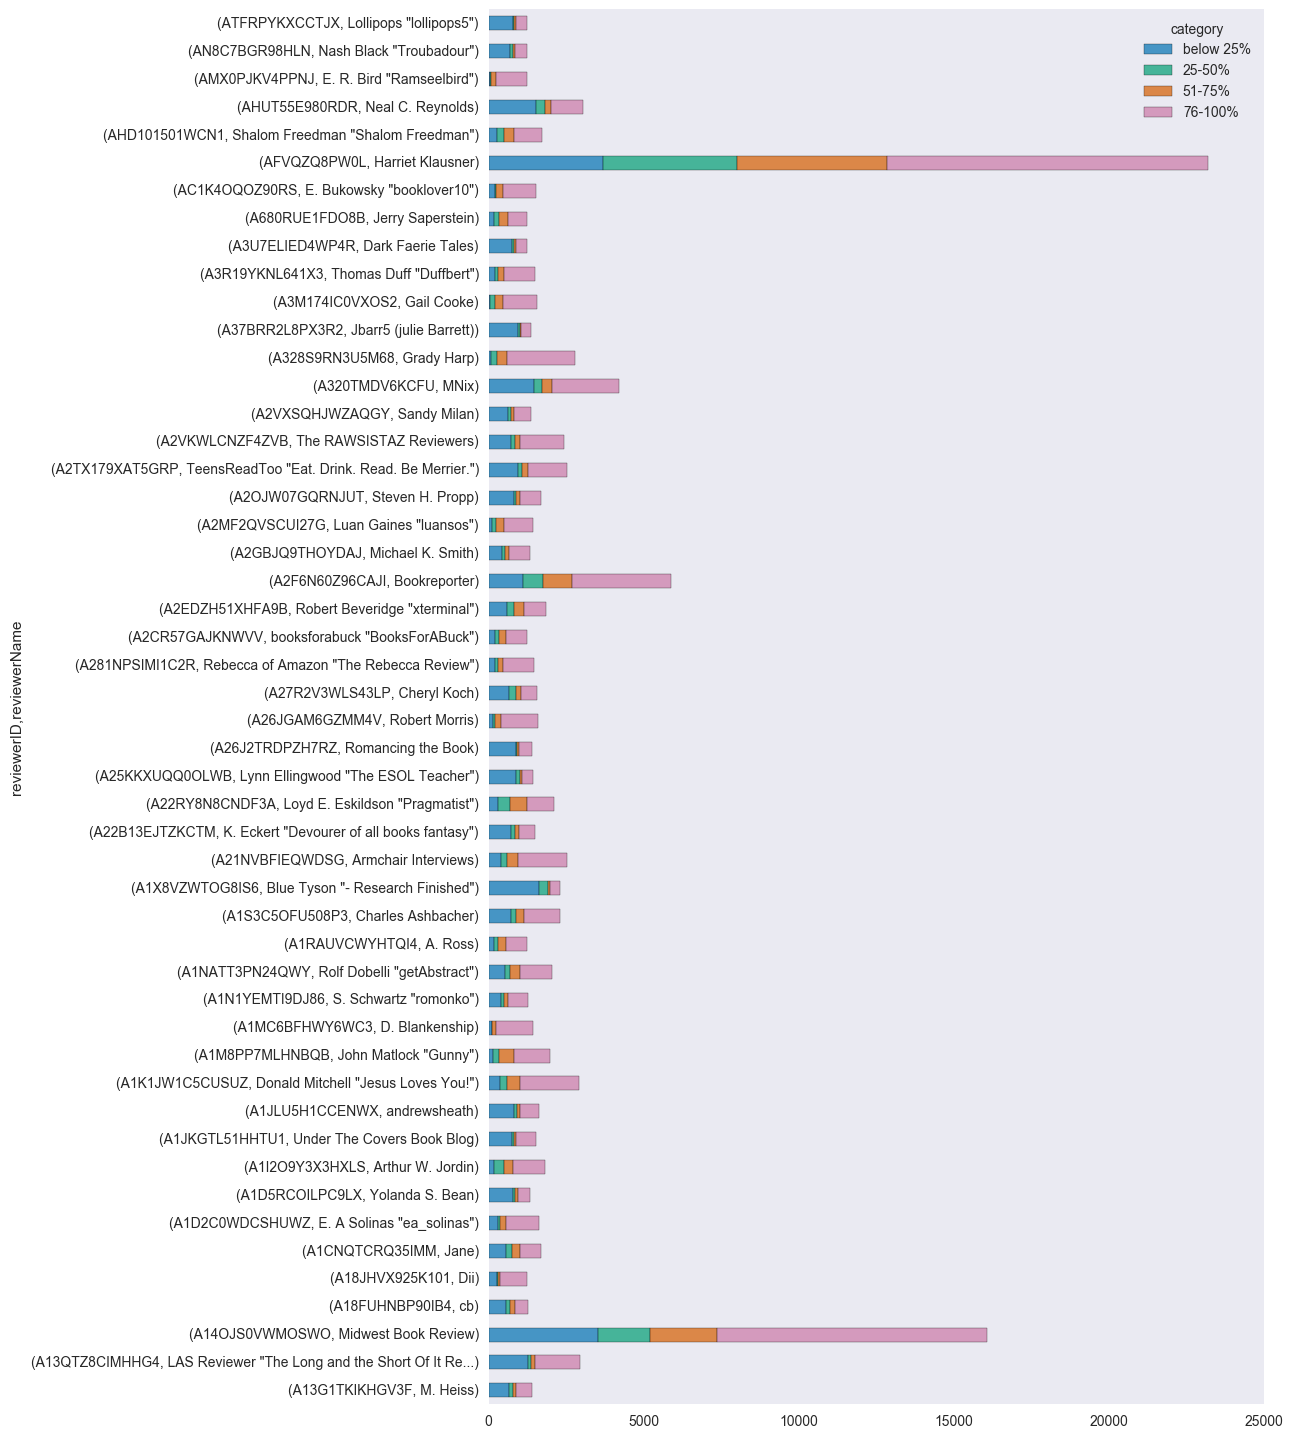

In [128]:
with sns.color_palette('colorblind', 10):
    g.unstack().plot(kind = 'barh', figsize = [10, 18], stacked = True, alpha = 0.7)
    #plt.ylim([-10, 10400])

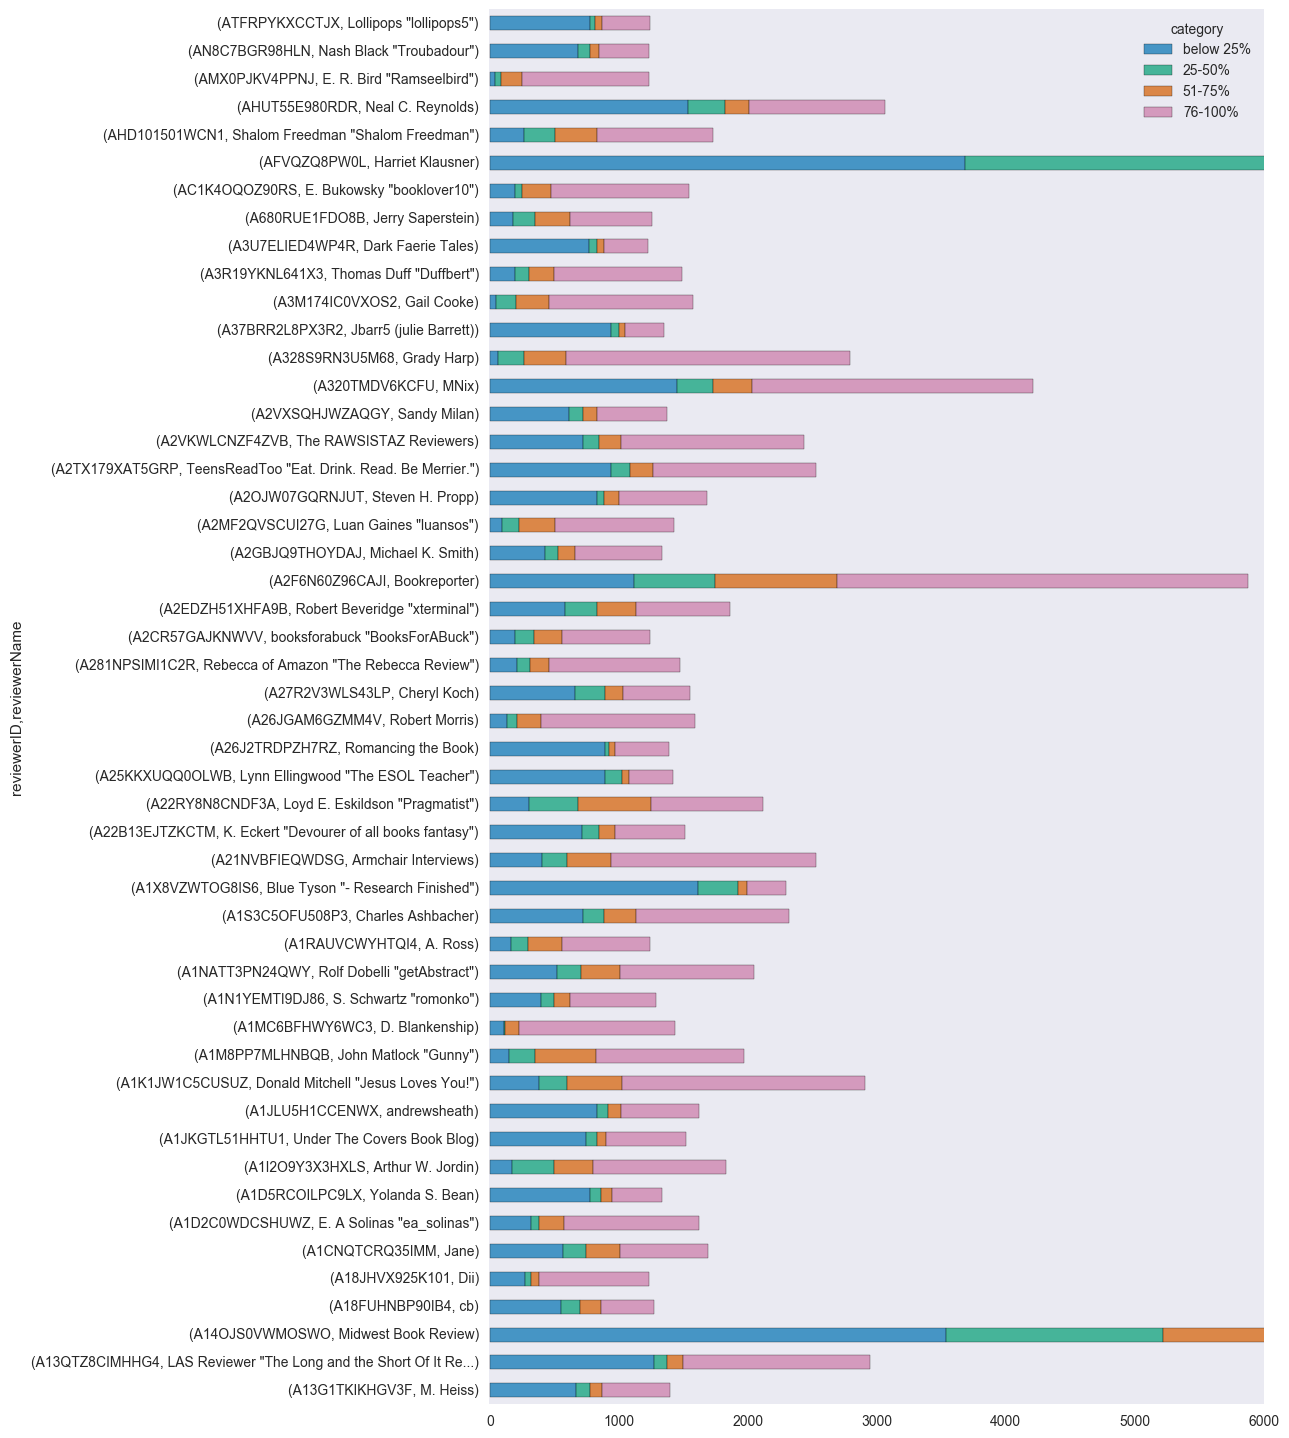

In [129]:
with sns.color_palette('colorblind', 10):
    g.unstack().plot(kind = 'barh', figsize = [10, 18], stacked = True, alpha = 0.7)
    plt.xlim([-10, 6000])

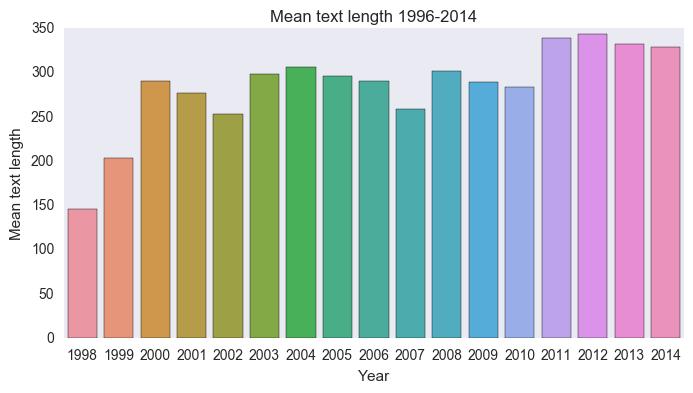

In [131]:
c = df.groupby(df.unixReviewTime.dt.year) # average length of reviews per year.
d = c['wordLength'].mean()
plt.figure(figsize= [8, 4])
sns.barplot(d.index, d)
plt.ylabel('Mean text length')
plt.xlabel('Year')
#plt.axhline(y= 184.0, linewidth=2, color='r')
plt.title('Mean text length 1996-2014')

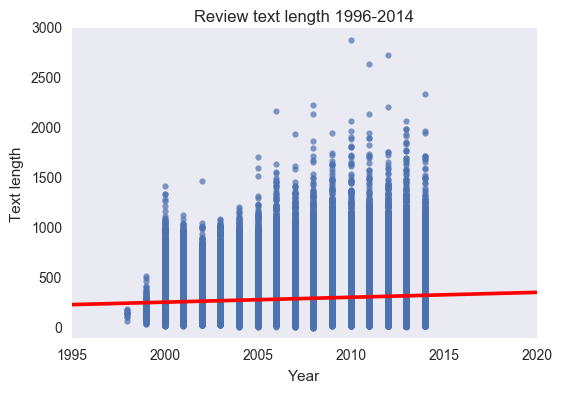

In [138]:
sns.regplot(x = df.unixReviewTime.dt.year, y = 'wordLength', data =df, scatter_kws={'alpha':0.7}, line_kws= {'color':'red'}, 
            fit_reg= True)
#plt.xlim([1994, 2009])
plt.ylim([-100, 3000])
plt.xlabel('Year')
plt.ylabel('Text length')
plt.title('Review text length 1996-2014')

In [145]:
df2 = df [['reviewerID', 'reviewerName', 'wordLength', 'percHelpful']]

In [146]:
df2['category'] = pd.cut(df2.loc[:, 'percHelpful'], bins, labels=group_names)
df2.head(1)

C:\Users\Bis\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,reviewerID,reviewerName,wordLength,percHelpful,category
0,A1JLU5H1CCENWX,NaN,581,0.0,below 25%


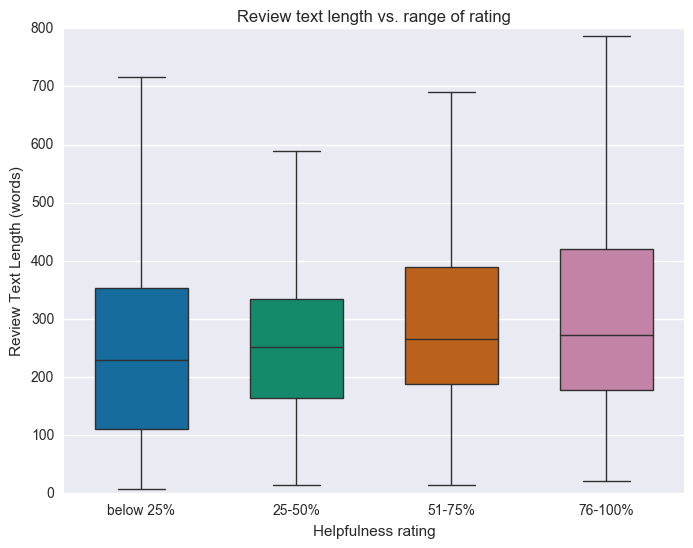

In [147]:
plt.figure(figsize=(8, 6)) 
sns.set_style("darkgrid")
sns.boxplot(y="wordLength", x="category", data=df2, palette="colorblind", linewidth= 1, showfliers=False, width = 0.6 )
sns.despine(left=True)
#plt.ylim([-50, 700])
plt.xlabel('Helpfulness rating')
plt.ylabel('Review Text Length (words)')
plt.title('Review text length vs. range of rating')

### Review text length

In [474]:
a = df2.groupby(['reviewerID', 'reviewerName'])
b = a['wordLength'].sum().sort_values(ascending = False)
dhw = pd.DataFrame(b)
dhw = dhw.reset_index()
dhw

,reviewerID,reviewerName,wordLength
0,AFVQZQ8PW0L,Harriet Klausner,283024
1,A2F6N60Z96CAJI,Bookreporter,142803
2,A1K1JW1C5CUSUZ,"Donald Mitchell ""Jesus Loves You!""",91347
3,A14OJS0VWMOSWO,Midwest Book Review,78998
4,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",60227
5,A1I2O9Y3X3HXLS,Arthur W. Jordin,57881
6,A328S9RN3U5M68,Grady Harp,50715
7,A26JGAM6GZMM4V,Robert Morris,47038
8,A22RY8N8CNDF3A,"Loyd E. Eskildson ""Pragmatist""",44777
9,A320TMDV6KCFU,MNix,42527


In [475]:
a = df2.groupby(['reviewerID', 'reviewerName'])
b = a['wordLength'].mean().sort_values(ascending = False)
dhm = pd.DataFrame(b)
dhm = dhm.reset_index()
dhm.columns = ['reviewerID', 'reviewerName', 'meanLength']
dhm

,reviewerID,reviewerName,meanLength
0,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",885.691176
1,A3U7ELIED4WP4R,Dark Faerie Tales,803.666667
2,A1I2O9Y3X3HXLS,Arthur W. Jordin,714.580247
3,A2F6N60Z96CAJI,Bookreporter,600.012605
4,A26JGAM6GZMM4V,Robert Morris,587.975000
5,A22B13EJTZKCTM,"K. Eckert ""Devourer of all books fantasy""",566.083333
6,A1K1JW1C5CUSUZ,"Donald Mitchell ""Jesus Loves You!""",521.982857
7,A2OJW07GQRNJUT,Steven H. Propp,481.696970
8,A1D2C0WDCSHUWZ,"E. A Solinas ""ea_solinas""",472.674419
9,A13QTZ8CIMHHG4,"LAS Reviewer ""The Long and the Short Of It Re...",469.492537


### Total and helpful votes

In [476]:
a = df.groupby(['reviewerID', 'reviewerName'])
b = a['totalVote'].sum().sort_values(ascending = False)
dht = pd.DataFrame(b)
dht = dht.reset_index()
dht

,reviewerID,reviewerName,totalVote
0,AFVQZQ8PW0L,Harriet Klausner,130761
1,A14OJS0VWMOSWO,Midwest Book Review,109000
2,A1K1JW1C5CUSUZ,"Donald Mitchell ""Jesus Loves You!""",70212
3,A22RY8N8CNDF3A,"Loyd E. Eskildson ""Pragmatist""",59394
4,A2F6N60Z96CAJI,Bookreporter,42720
5,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",32474
6,A26JGAM6GZMM4V,Robert Morris,30327
7,A1M8PP7MLHNBQB,"John Matlock ""Gunny""",29581
8,A1D2C0WDCSHUWZ,"E. A Solinas ""ea_solinas""",27192
9,AHD101501WCN1,"Shalom Freedman ""Shalom Freedman""",26518


In [477]:
a = df.groupby(['reviewerID', 'reviewerName'])
b = a['helpfulVote'].sum().sort_values(ascending = False)
dhh = pd.DataFrame(b)
dhh = dhh.reset_index()
dhh

,reviewerID,reviewerName,helpfulVote
0,AFVQZQ8PW0L,Harriet Klausner,95387
1,A14OJS0VWMOSWO,Midwest Book Review,89336
2,A1K1JW1C5CUSUZ,"Donald Mitchell ""Jesus Loves You!""",63314
3,A22RY8N8CNDF3A,"Loyd E. Eskildson ""Pragmatist""",39485
4,A2F6N60Z96CAJI,Bookreporter,35865
5,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",28842
6,A26JGAM6GZMM4V,Robert Morris,27354
7,A1D2C0WDCSHUWZ,"E. A Solinas ""ea_solinas""",24020
8,A1M8PP7MLHNBQB,"John Matlock ""Gunny""",23626
9,AC1K4OQOZ90RS,"E. Bukowsky ""booklover10""",21175


### Number of reviews

In [473]:
a = df1.groupby(['reviewerID','reviewerName']).size().sort_values(ascending = False)
dha = pd.DataFrame(a)
dha = dha.reset_index()
dha.columns = ['reviewerID', 'reviewerName', 'numReviews']
dha

,reviewerID,reviewerName,numReviews
0,AFVQZQ8PW0L,Harriet Klausner,18264
1,A14OJS0VWMOSWO,Midwest Book Review,11411
2,A2F6N60Z96CAJI,Bookreporter,4277
3,A1K1JW1C5CUSUZ,"Donald Mitchell ""Jesus Loves You!""",2409
4,A328S9RN3U5M68,Grady Harp,2168
5,A320TMDV6KCFU,MNix,2042
6,A21NVBFIEQWDSG,Armchair Interviews,1933
7,A22RY8N8CNDF3A,"Loyd E. Eskildson ""Pragmatist""",1870
8,A1M8PP7MLHNBQB,"John Matlock ""Gunny""",1837
9,AHD101501WCN1,"Shalom Freedman ""Shalom Freedman""",1435


### Summary table

In [480]:
dfr1 = pd.merge(dha, dht, how = 'inner', on=['reviewerID', 'reviewerName'])
dfr2 = pd.merge(dfr1, dhh, how = 'inner', on=['reviewerID', 'reviewerName'])
dfr3 = pd.merge(dfr2, dhw, how = 'inner', on=['reviewerID', 'reviewerName'])
dfr4 = pd.merge(dfr3, dhm, how = 'inner', on=['reviewerID', 'reviewerName'])
df_all = pd.merge(dfr4, dhr, how = 'inner', on=['reviewerID', 'reviewerName'])
df_all

,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful
0,AFVQZQ8PW0L,Harriet Klausner,18264,130761,95387,283024,250.907801,0.653315
1,A14OJS0VWMOSWO,Midwest Book Review,11411,109000,89336,78998,109.872045,0.659227
2,A2F6N60Z96CAJI,Bookreporter,4277,42720,35865,142803,600.012605,0.677867
3,A1K1JW1C5CUSUZ,"Donald Mitchell ""Jesus Loves You!""",2409,70212,63314,91347,521.982857,0.740617
4,A328S9RN3U5M68,Grady Harp,2168,20336,18026,50715,396.210938,0.880532
5,A320TMDV6KCFU,MNix,2042,14244,12224,42527,340.216000,0.586845
6,A21NVBFIEQWDSG,Armchair Interviews,1933,19493,16992,36640,293.120000,0.731353
7,A22RY8N8CNDF3A,"Loyd E. Eskildson ""Pragmatist""",1870,59394,39485,44777,434.728155,0.636121
8,A1M8PP7MLHNBQB,"John Matlock ""Gunny""",1837,29581,23626,25936,210.861789,0.745602
9,AHD101501WCN1,"Shalom Freedman ""Shalom Freedman""",1435,26518,17356,25025,287.643678,0.683724


** Corporate accounts** (This includes Harriet Klausner)
AFVQZQ8PW0L, Harriet Klausner, A14OJS0VWMOSWO, Midwest Book Review, A2F6N60Z96CAJI, Bookreporter, A320TMDV6KCFU, MNix, 
A13QTZ8CIMHHG4, LAS Reviewer "The Long and the Short Of It Re..., A2TX179XAT5GRP, TeensReadToo "Eat. Drink. Read. Be Merrier."
A21NVBFIEQWDSG, Armchair Interviews, A2VKWLCNZF4ZVB, The RAWSISTAZ Reviewers, A1JKGTL51HHTU1, Under The Covers Book Blog, 
A26J2TRDPZH7RZ, Romancing the Book, A2CR57GAJKNWVV, booksforabuck "BooksForABuck", A3U7ELIED4WP4R, Dark Faerie Tales

In [519]:
df_helpful = df_all.sort_values(by = 'percHelpful', ascending = False) # Sorted by helpfulness rating
df_helpful.reset_index()

,index,reviewerID,reviewerName,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful
0,4,A328S9RN3U5M68,Grady Harp,2168,20336,18026,50715,396.210938,0.880532
1,24,A1MC6BFHWY6WC3,D. Blankenship,1071,9982,9370,24754,375.060606,0.877999
2,19,AMX0PJKV4PPNJ,"E. R. Bird ""Ramseelbird""",1162,32474,28842,60227,885.691176,0.857057
3,11,A3M174IC0VXOS2,Gail Cooke,1382,16546,14314,26790,301.011236,0.827966
4,12,A26JGAM6GZMM4V,Robert Morris,1346,30327,27354,47038,587.975000,0.810562
5,16,A2MF2QVSCUI27G,"Luan Gaines ""luansos""",1236,20414,17430,33837,412.646341,0.776632
6,17,AC1K4OQOZ90RS,"E. Bukowsky ""booklover10""",1194,23488,21175,34016,425.200000,0.774243
7,23,A281NPSIMI1C2R,"Rebecca of Amazon ""The Rebecca Review""",1083,23143,20975,22054,355.709677,0.761835
8,21,A3R19YKNL641X3,"Thomas Duff ""Duffbert""",1148,15495,13882,30686,432.197183,0.758509
9,8,A1M8PP7MLHNBQB,"John Matlock ""Gunny""",1837,29581,23626,25936,210.861789,0.745602


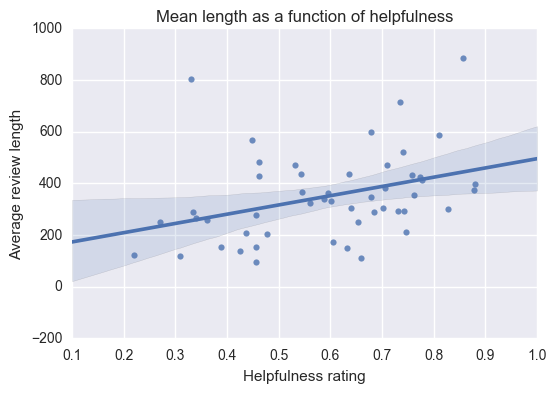

In [484]:
sns.set_style("darkgrid")
sns.regplot(df_all.percHelpful, df_all.meanLength)
plt.xlabel("Helpfulness rating")
plt.ylabel("Average review length")
plt.title ("Mean length as a function of helpfulness")
plt.show()

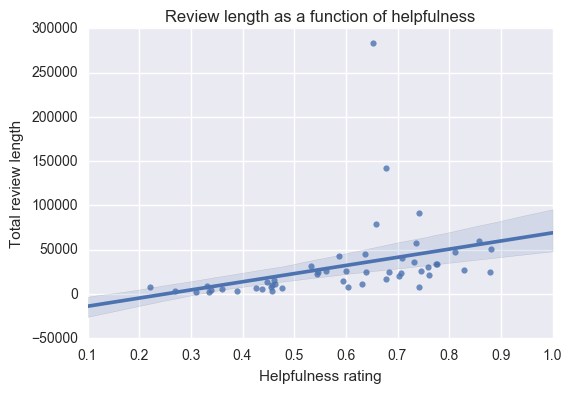

In [487]:
sns.regplot(df_all.percHelpful, df_all.wordLength)
plt.xlabel("Helpfulness rating")
plt.ylabel("Total review length")
plt.ylim([-50000, 300000])
plt.title ("Review length as a function of helpfulness")
plt.show()

In [212]:
df_all.corr()

,numReviews,totalVote,helpfulVote,wordLength,meanLength,percHelpful
numReviews,1.000000,0.852028,0.823787,0.833775,-0.137789,0.099674
totalVote,0.852028,1.000000,0.993077,0.763031,0.079228,0.386601
helpfulVote,0.823787,0.993077,1.000000,0.740984,0.111898,0.428909
wordLength,0.833775,0.763031,0.740984,1.000000,0.272785,0.232045
meanLength,-0.137789,0.079228,0.111898,0.272785,1.000000,0.407020
percHelpful,0.099674,0.386601,0.428909,0.232045,0.407020,1.000000


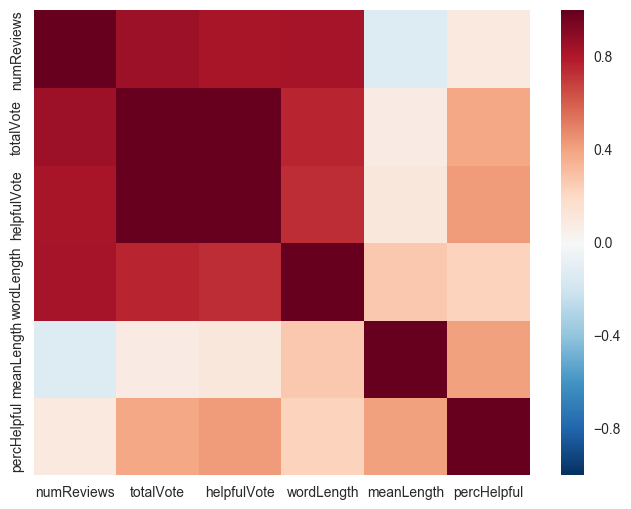

In [215]:
plt.figure(figsize = [8, 6])
sns.heatmap(df_all.corr())

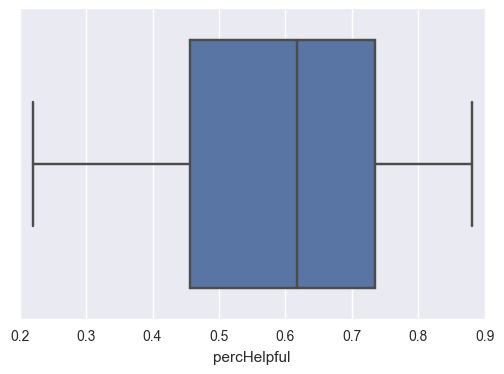

In [216]:
sns.boxplot(df_all.percHelpful)

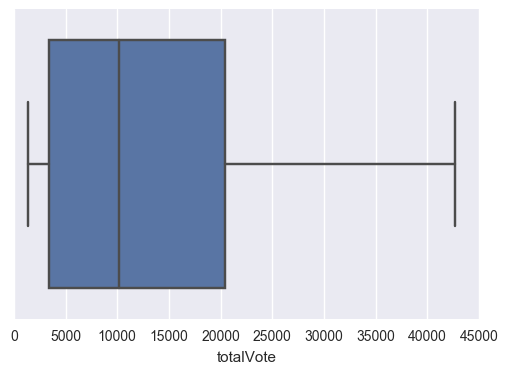

In [218]:
sns.boxplot(df_all.totalVote, showfliers=False)

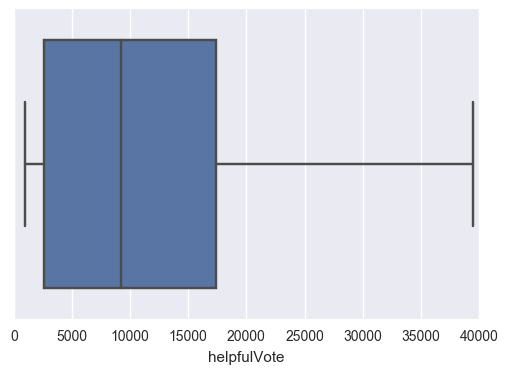

In [219]:
sns.boxplot(df_all.helpfulVote, showfliers=False)

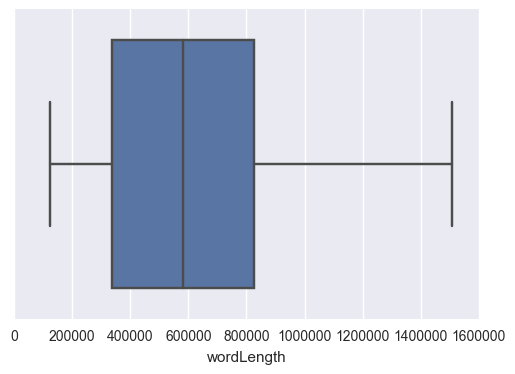

In [221]:
sns.boxplot(df_all.wordLength, showfliers=False)

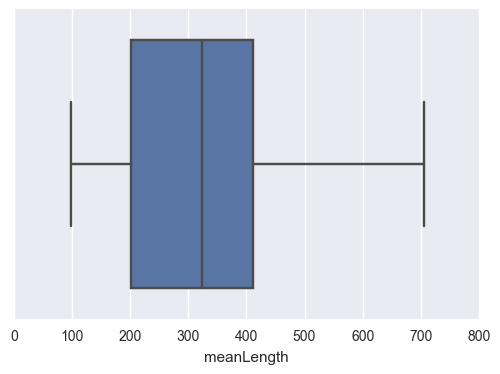

In [222]:
sns.boxplot(df_all.meanLength, showfliers=False)

### K-means clustering and feature selections by inspecting review summary

I made a title table from the book metadata. 

In [398]:
df3 = pd.read_csv("book_titles_new.csv")
df3.head(1)

,asin,title
0,0001048791,"The Crucible: Performed by Stuart Pankin, Jero..."


In [399]:
df = df.merge(df3, on = "asin")
df.head(1)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title
0,A1JLU5H1CCENWX,NaN,B00HYQJPC2,0,0,2014-02-02 00:00:00 UTC,I made lots of notes in this book and I don't ...,581,5,Dex,NaN


Let's take a subset of the data with at least 2 total votes. Then sample the dataset with 5000 random rows.

In [422]:
df1 = df[df.totalVote > 1]
len(df1)

81639

In [423]:
df2 = df1.sample(n = 5000)
df2.head(2)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title
87406,A1M8PP7MLHNBQB,"John Matlock ""Gunny""",1566252520,3,3,2005-08-07 00:00:00 UTC,To me this books title and sub-title are incon...,272,5,Good history of the 'NEW' media.,America's Right Turn: How Conservatives Used N...
74646,A14OJS0VWMOSWO,Midwest Book Review,078522744X,2,2,2009-11-13 00:00:00 UTC,"A libertarian, a feminist, and an agnostic, Ki...",121,5,A journey of spiritual awakening,Heaven Without Her: A Desperate Daughter's Sea...


In [424]:
df2.reviewerName.value_counts()

Harriet Klausner                                    1128
Midwest Book Review                                  719
Bookreporter                                         238
Donald Mitchell "Jesus Loves You!"                   175
Grady Harp                                           128
MNix                                                 125
Armchair Interviews                                  125
John Matlock "Gunny"                                 123
Loyd E. Eskildson "Pragmatist"                       103
Gail Cooke                                            89
Shalom Freedman "Shalom Freedman"                     87
E. A Solinas "ea_solinas"                             86
Luan Gaines "luansos"                                 82
TeensReadToo "Eat. Drink. Read. Be Merrier."          81
Arthur W. Jordin                                      81
The RAWSISTAZ Reviewers                               81
Robert Morris                                         80
E. Bukowsky "booklover10"      

I have used K-means clustering to look at top n words based on review summary. Then categorized reviewers and books according to cluster numbers. Some of the codes below is taken from http://brandonrose.org/clustering

In [402]:
def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [430]:
add_text = ["book", "great", "good", "'s", "n't", "read", "beautiful", "told", "however", "highly", "recommended", "excellent",
           "super", "reader", "best", "sf", "enjoy", "free", "like", "very", "better", "telling", "nice", "wonderful",
           "fascinating", "interesting", "enjoyable", "However", "another", "first", "little", "really", "bad", "boring"
           "disappointing", "terrible", "weak", "predictable", "story", "recommend"]

my_stop_words = text.ENGLISH_STOP_WORDS.union(add_text)

In [431]:
import nltk
import re
import os
import codecs
from sklearn import feature_extraction
from sklearn.feature_extraction import text
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.externals import joblib
from __future__ import print_function

stemmer = SnowballStemmer("english")
my_stop_words = my_stop_words



def get_clusters(dataframe, max_features, num_clusters, num_top_words):
    
    totalvocab_stemmed = []
    totalvocab_tokenized = []
    for i in dataframe.summary:
        allwords_stemmed = tokenize_and_stem(i) 
        totalvocab_stemmed.extend(allwords_stemmed) 

        allwords_tokenized = tokenize_only(i)
        totalvocab_tokenized.extend(allwords_tokenized)

    vocab_frame = pd.DataFrame({'words': totalvocab_tokenized}, index = totalvocab_stemmed)
    vocab_frame = vocab_frame.drop(add_text)
    tfidf_vectorizer = TfidfVectorizer(max_df=1.0, max_features=max_features,
                                     min_df=0.0, stop_words=set(my_stop_words),
                                     use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,1))

    print ("Tfidf:") 
    %time tfidf_matrix = tfidf_vectorizer.fit_transform(dataframe.summary) 
    terms = tfidf_vectorizer.get_feature_names()

    num_clusters = num_clusters
    km = KMeans(n_clusters=num_clusters, random_state= 123)
    print ("K-means fit:") 
    %time km.fit(tfidf_matrix)
    clusters = km.labels_.tolist()

    joblib.dump(km,  'doc_cluster.pkl')
    km = joblib.load('doc_cluster.pkl')
    clusters = km.labels_.tolist()
    dataframe['clusterName'] = clusters
    print()
    print ("Number of items in each cluster:")
    print (dataframe.clusterName.value_counts())
    dataframe = dataframe.set_index('clusterName')
    print()
    print("Top terms per cluster:")
    print()
    #sort cluster centers by proximity to centroid
    order_centroids = km.cluster_centers_.argsort()[:, ::-1] 
        
    for i in range(num_clusters):
        print("Cluster %d top words:" % i, end='')

        for ind in order_centroids[i, :num_top_words]: #replace 6 with n words per cluster
            print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
        print() #add whitespace
        print() #add whitespace

        print("Cluster %d reviewers:" % i, end='')
        for reviewer in dataframe.ix[i]['reviewerName'].unique():
            print(' %s,' % reviewer, end='')
        print() #add whitespace
        print() #add whitespace

        print("Cluster %d books:" % i, end='')
        for book in dataframe.ix[i]['title'][:10]:
            print(' %s,' % book, end='')
        print() #add whitespace
        print() #add whitespace

    print()
    print()

In [432]:
get_clusters(df2, 5000, 5, 5) # df2 is a 5000 row sample of the dataset with totalvote > 2. I am taking 5000 features, 
# 5 clusters and 5 top words. 

Tfidf:
Wall time: 1.61 s
K-means fit:
Wall time: 1.89 s

Number of items in each cluster:
0    4371
4     214
2     191
1     143
3      81
Name: clusterName, dtype: int64

Top terms per cluster:

Cluster 0 top words: romance, story, tale, love, excellent,

Cluster 0 reviewers: John Matlock "Gunny", Midwest Book Review, booksforabuck "BooksForABuck", Robert Beveridge "xterminal", Rebecca of Amazon "The Rebecca Review", Bookreporter, D. Blankenship, Shalom Freedman "Shalom Freedman", The RAWSISTAZ Reviewers, Harriet Klausner, Michael K. Smith, Luan Gaines "luansos", Rolf Dobelli "getAbstract", Blue Tyson "- Research Finished", Gail Cooke, Lynn Ellingwood "The ESOL Teacher", E. A Solinas "ea_solinas", Grady Harp, E. Bukowsky "booklover10", Dii, cb, MNix, Jane, Loyd E. Eskildson "Pragmatist", Neal C. Reynolds, Nash Black "Troubadour", Under The Covers Book Blog, Armchair Interviews, Charles Ashbacher, Donald Mitchell "Jesus Loves You!", Cheryl Koch, Thomas Duff "Duffbert", LAS Reviewer "T

#### Let's take out Harriet Klausner and Midwest Book Review (top 2 reviewers with 23000 + 16000 total reviews)

In [428]:
df4 = df1[(df1.reviewerID != "A14OJS0VWMOSWO") & (df1.reviewerID != "AFVQZQ8PW0L")]
df5 = df4.sample(n = 5000)
df5.head(2)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title
73110,A1S3C5OFU508P3,Charles Ashbacher,1422175626,1,2,2009-06-18 00:00:00 UTC,While I do not question the quality of the adv...,368,5,Advice that is timeless and valuable even thou...,Harvard Business Review on Managing Through a ...
88011,A2VKWLCNZF4ZVB,The RAWSISTAZ Reviewers,1902881591,3,3,2003-02-28 00:00:00 UTC,Water Street is a collection of short stories ...,123,5,Water Street Feels Like Home,Water Street


In [434]:
df5.reviewerName.value_counts()

Bookreporter                                        429
Donald Mitchell "Jesus Loves You!"                  243
Grady Harp                                          199
MNix                                                198
Loyd E. Eskildson "Pragmatist"                      183
Armchair Interviews                                 181
John Matlock "Gunny"                                181
Arthur W. Jordin                                    154
Rolf Dobelli "getAbstract"                          141
Charles Ashbacher                                   140
Gail Cooke                                          139
Shalom Freedman "Shalom Freedman"                   136
Luan Gaines "luansos"                               124
The RAWSISTAZ Reviewers                             123
Robert Beveridge "xterminal"                        119
Robert Morris                                       118
E. Bukowsky "booklover10"                           114
TeensReadToo "Eat. Drink. Read. Be Merrier."    

In [433]:
get_clusters(df5, 5000, 5, 5) # df5 is without the top two reviewers

Tfidf:
Wall time: 1.63 s
K-means fit:
Wall time: 909 ms

Number of items in each cluster:
2    4682
3     123
0     112
1      68
4      15
Name: clusterName, dtype: int64

Top terms per cluster:

Cluster 0 top words: courtesy, teens, kids, zoo, flawed,

Cluster 0 reviewers: TeensReadToo "Eat. Drink. Read. Be Merrier.",

Cluster 0 books: Plus, NERDS: National Espionage, Rescue, and Defense Society (Book One), The Returners, The Time Pirate: A Nick McIver Time Adventure (Nick McIver Time Adventures), Diary of a Witness, School's Out - Forever (Maximum Ride, Book 2), Summer in the City, Allure: Confessions of a Beauty Editor, You, Megan Meade's Guide to the McGowan Boys,

Cluster 1 top words: fun, series, fantasy, lots, characters,

Cluster 1 reviewers: Loyd E. Eskildson "Pragmatist", Thomas Duff "Duffbert", Yolanda S. Bean, Bookreporter, Dii, Jane, Robert Beveridge "xterminal", Rebecca of Amazon "The Rebecca Review", Armchair Interviews, booksforabuck "BooksForABuck", E. A Solinas "ea_s

#### There are some corporate reviewers, let's make a subset of them. I have included Harriet Klausner in this list

In [435]:
corporate_list = ["AFVQZQ8PW0L", "A14OJS0VWMOSWO", "A2F6N60Z96CAJI", "A320TMDV6KCFU", "A13QTZ8CIMHHG4", "A2TX179XAT5GRP",
                 "A21NVBFIEQWDSG", "A2VKWLCNZF4ZVB", "A1JKGTL51HHTU1", "A26J2TRDPZH7RZ", "A2CR57GAJKNWVV", "A3U7ELIED4WP4R"]
df6 = df1[df1.reviewerID.isin(corporate_list)]
len(df6)

43361

In [436]:
df7 = df6.sample(n = 5000)
df7.head(2)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title
73626,A14OJS0VWMOSWO,Midwest Book Review,0451231589,2,2,2011-01-18 00:00:00 UTC,A HOLIDAY YARN provides a fine Seaside Knitter...,66,5,An excellent blend of knitting and mystery,A Holiday Yarn: A Seaside Knitters Mystery
38649,A1JKGTL51HHTU1,Under The Covers Book Blog,0007442920,7,9,2012-05-17 00:00:00 UTC,InsurgentReviewed by Fran & posted at Under Th...,358,3,enjoyed,Insurgent (Divergent)


In [437]:
df7.reviewerName.value_counts()

Harriet Klausner                                    2152
Midwest Book Review                                 1327
Bookreporter                                         523
MNix                                                 230
Armchair Interviews                                  196
The RAWSISTAZ Reviewers                              138
TeensReadToo "Eat. Drink. Read. Be Merrier."         124
LAS Reviewer "The Long and the Short Of It Re...     104
booksforabuck "BooksForABuck"                        103
Under The Covers Book Blog                            52
Dark Faerie Tales                                     32
Romancing the Book                                    19
Name: reviewerName, dtype: int64

In [438]:
get_clusters(df7, 5000, 5, 5)

Tfidf:
Wall time: 1.57 s
K-means fit:
Wall time: 1.38 s

Number of items in each cluster:
0    3885
2     419
4     329
3     244
1     123
Name: clusterName, dtype: int64

Top terms per cluster:

Cluster 0 top words: tale, mystery, story, historical, any,

Cluster 0 reviewers: Midwest Book Review, Under The Covers Book Blog, Harriet Klausner, booksforabuck "BooksForABuck", Bookreporter, MNix, The RAWSISTAZ Reviewers, Armchair Interviews, LAS Reviewer "The Long and the Short Of It Re..., Dark Faerie Tales, Romancing the Book, TeensReadToo "Eat. Drink. Read. Be Merrier.",

Cluster 0 books: A Holiday Yarn: A Seaside Knitters Mystery, Insurgent (Divergent), Star Wars: Outbound Flight, A Highlander for Christmas, The Hero Schliemann: The Dreamer Who Dug For Troy, The Five-Year Party: How Colleges Have Given Up on Educating Your Child and What You Can Do About It, In the House Upon the Dirt Between the Lake and the Woods, The Disappearance at Pere-Lachaise: A Victor Legris Mystery (Victor L

In [439]:
get_clusters(df7, 5000, 10, 5) # 10 clusters

Tfidf:
Wall time: 1.61 s
K-means fit:
Wall time: 1.4 s

Number of items in each cluster:
1    3128
0     429
6     328
9     310
8     226
4     183
3     123
2     121
5      94
7      58
Name: clusterName, dtype: int64

Top terms per cluster:

Cluster 0 top words: any, suspense, romantic, library, drama,

Cluster 0 reviewers: Harriet Klausner, Midwest Book Review, The RAWSISTAZ Reviewers, booksforabuck "BooksForABuck", Bookreporter, Armchair Interviews, Under The Covers Book Blog, MNix,

Cluster 0 books: nan, Forbidden: The Revolution, Cowl, nan, Rock Bottom, The Storyteller's Candle/La velita de los cuentos, Table for One, The Weekend Novelist Rewrites the Novel: A Step-by-Step Guide to Perfecting Your Work, Captain Saturday: A Novel, His Last Letter: Elizabeth I and the Earl of Leicester,

Cluster 1 top words: mystery, story, highly, fun, love,

Cluster 1 reviewers: Under The Covers Book Blog, booksforabuck "BooksForABuck", Midwest Book Review, Bookreporter, Harriet Klausner, MNix,

#### Let's take a subset of individual reviewers

In [440]:
df8 = df1[~df1.reviewerID.isin(corporate_list)] # when it's not a corporate account
len(df8)

38278

In [520]:
df8.head(2)

,reviewerID,reviewerName,asin,helpfulVote,totalVote,unixReviewTime,reviewText,wordLength,overall,summary,title
21,A22B13EJTZKCTM,"K. Eckert ""Devourer of all books fantasy""",0544142934,0,3,2014-05-19 00:00:00 UTC,I got a copy of this book to review through Am...,675,3,3.5 stars; engaging and promiscuous read about...,Adam
31,A1K1JW1C5CUSUZ,NaN,030726999X,1,2,2010-06-12 00:00:00 UTC,"""I traverse the way of righteousness,In the mi...",335,5,Justice,The Girl Who Kicked the Hornet's Nest (Millenn...


In [441]:
df9 = df8.sample(n = 5000)

In [442]:
get_clusters(df9, 5000, 5, 5)

Tfidf:
Wall time: 1.66 s
K-means fit:
Wall time: 1.51 s

Number of items in each cluster:
0    4237
2     503
4     103
1      99
3      58
Name: clusterName, dtype: int64

Top terms per cluster:

Cluster 0 top words: excellent, high, history, fun, make,

Cluster 0 reviewers: M. Heiss, K. Eckert "Devourer of all books fantasy", Jerry Saperstein, Arthur W. Jordin, E. A Solinas "ea_solinas", Neal C. Reynolds, Loyd E. Eskildson "Pragmatist", Steven H. Propp, Gail Cooke, Robert Morris, Robert Beveridge "xterminal", Luan Gaines "luansos", Sandy Milan, Grady Harp, E. R. Bird "Ramseelbird", Michael K. Smith, Charles Ashbacher, cb, Thomas Duff "Duffbert", Nash Black "Troubadour", Dii, Lynn Ellingwood "The ESOL Teacher", Shalom Freedman "Shalom Freedman", Jane, Donald Mitchell "Jesus Loves You!", John Matlock "Gunny", E. Bukowsky "booklover10", Rolf Dobelli "getAbstract", Rebecca of Amazon "The Rebecca Review", D. Blankenship, A. Ross, S. Schwartz "romonko", Lollipops "lollipops5", Yolanda S. B

### Topic extraction from review text

In [446]:
from sklearn.decomposition import NMF, LatentDirichletAllocation

In [498]:
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, max_features=5000,
                                     min_df= 0.0, stop_words=set(my_stop_words),
                                     use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,1))

    
%time tfidf_matrix = tfidf_vectorizer.fit_transform(df9.summary) 
terms = tfidf_vectorizer.get_feature_names()
tfidf_matrix.shape

Wall time: 2.03 s


(5000, 4962)

In [504]:
lda = LatentDirichletAllocation(n_topics=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)

In [505]:
lda.fit(tfidf_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='online', learning_offset=50.0,
             max_doc_update_iter=100, max_iter=5, mean_change_tol=0.001,
             n_jobs=1, n_topics=10, perp_tol=0.1, random_state=0,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [501]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % topic_idx)
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()

In [506]:
print_top_words(lda, terms, 10)

Topic #0:
learn want realli solid pack come manual fine knowledg differ
Topic #1:
start man death miss novel oh point complex stuff leader
Topic #2:
love romanc mysteri star far thriller entertain charact stori suspens
Topic #3:
seri high anoth short work tri way delight author instal
Topic #4:
beauti classic wonder inform right fiction histor think fascin woman
Topic #5:
excel time histori did peopl idea heart old thought account
Topic #6:
alex world graphic delawar sale funni humor hot fast continu
Topic #7:
just live pretti michael bugliosi greenburg futur vincent m. hope
Topic #8:
shine strong quot long stori minor speci end magic tale
Topic #9:
review insight life fun veri write guid human chang craft

